In [80]:
from shogun import *
import numpy as np
from scipy.io import loadmat, savemat
from os       import path, sep

mat  = loadmat(sep.join([ 'C:/Users/zxy/Desktop/文档/研一下课程/machine learning/usps_resampled.mat']))
Xall = mat['train_patterns']
Yall = array(mat['train_labels'].squeeze(), dtype=float)
#Yall = Yall + 1

In [81]:
label_list=list()
for i in range(0,Yall.shape[1]):
    col=Yall[:,i]
    for i_label in range(0,len(col)):
        if col[i_label]==1:
            label_list.append(float(i_label))
Yall=np.array(label_list)

In [82]:
subset = np.random.permutation(len(Yall))
#get first 1000 examples
Xtrain = Xall[:, subset[:1000]]
Ytrain = Yall[subset[:1000]]

Nsplit = 2
all_ks = range(1, 21)

print(Xall.shape)
print(Xtrain.shape)
print(Yall.shape)

(256, 4649)
(256, 1000)
(4649,)


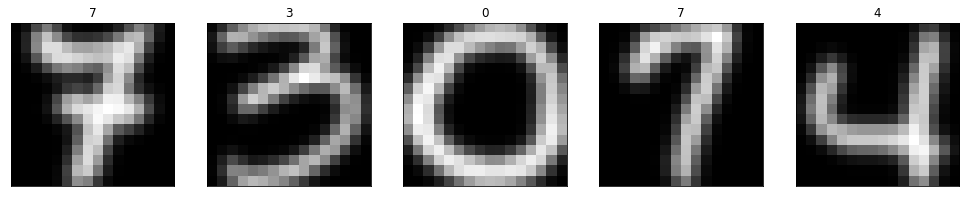

In [83]:
from matplotlib.pyplot import *
def plot_example(dat, lab):
    for i in range(5):
        ax=subplot(1,5,i+1)
        ax.set_title(int(lab[i]))
        ax.imshow(dat[:,i].reshape((16,16)), interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
        
        
_=figure(figsize=(17,6))
gray()
plot_example(Xtrain, Ytrain)

In [84]:
# MKL training and output
labels = MulticlassLabels(Ytrain)
feats  = RealFeatures(Xtrain)
#get test data from 4000 onwards
Xrem=Xall[:,subset[4000:]]
Yrem=Yall[subset[4000:]]

#test features not used in training
feats_rem=RealFeatures(Xrem)             
labels_rem=MulticlassLabels(Yrem)

kernel = CombinedKernel()
feats_train = CombinedFeatures()
feats_test = CombinedFeatures()

#append gaussian kernel
subkernel = GaussianKernel(10,15)        
feats_train.append_feature_obj(feats)
feats_test.append_feature_obj(feats_rem)
kernel.append_kernel(subkernel)

#append PolyKernel
feats  = RealFeatures(Xtrain)
subkernel = PolyKernel(10,2)            
feats_train.append_feature_obj(feats)
feats_test.append_feature_obj(feats_rem)
kernel.append_kernel(subkernel)

kernel.init(feats_train, feats_train)



True

Accuracy = 95.53%
[9. 8. 9. 0. 1.]
[9. 8. 1. 7. 1.]


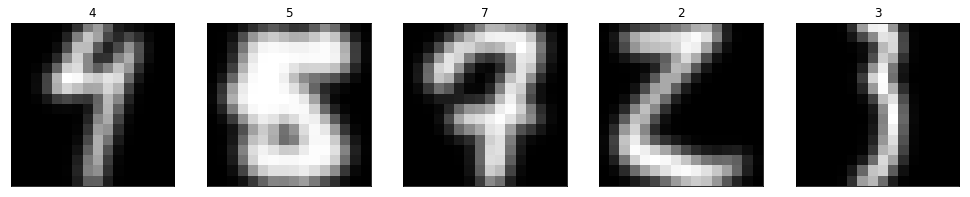

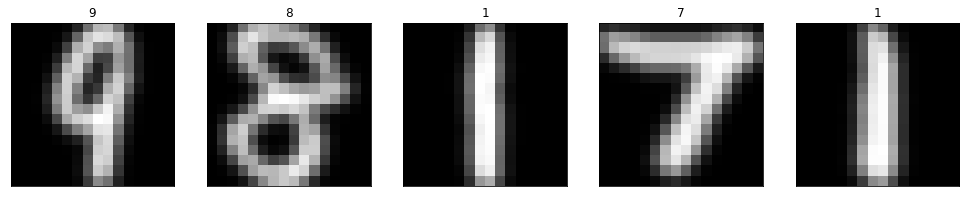

In [85]:
mkl = MKLMulticlass(1.2, kernel, labels)

mkl.set_epsilon(1e-2)
mkl.set_mkl_epsilon(0.001)
mkl.set_mkl_norm(1)

mkl.train()

#initialize with test features
kernel.init(feats_train, feats_test)     

out =  mkl.apply()
evaluator = MulticlassAccuracy()
accuracy = evaluator.evaluate(out, labels_rem)
print("Accuracy = %2.2f%%" % (100*accuracy))

idx=np.where(out.get_labels() != Yrem)[0]
Xbad=Xrem[:,idx]
Ybad=Yrem[idx]
_=figure(figsize=(17,6))
gray()
plot_example(Xbad, Ybad)
print(out.get_labels()[idx[:5]])

idx=np.where(out.get_labels() == Yrem)[0]
Xgood=Xrem[:,idx]
Ygood=Yrem[idx]
_=figure(figsize=(17,6))
gray()
plot_example(Xgood, Ygood)
print(out.get_labels()[idx[:5]])

In [86]:
w=kernel.get_subkernel_weights()
print(w)

[0.81304226 0.18695774]


Accuracy = 95.07%
[9. 6. 8. 9. 2.]
[9. 8. 1. 7. 1.]


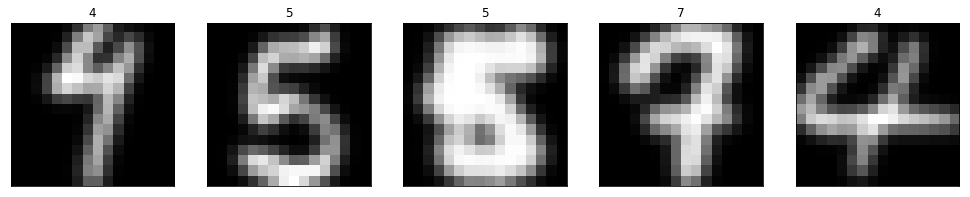

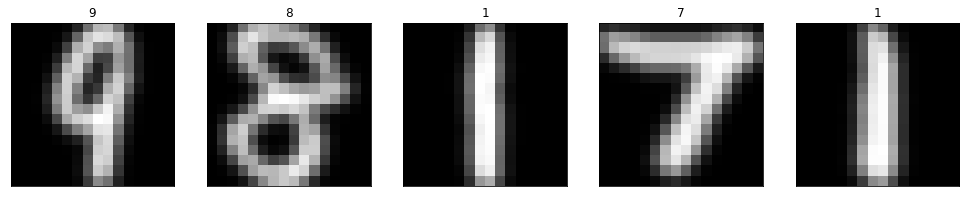

In [87]:
# Single kernel:PolyKernel
C=1

pk=PolyKernel(10,2) 

svm=GMNPSVM(C, pk, labels)
_=svm.train(feats)
out=svm.apply(feats_rem)
evaluator = MulticlassAccuracy()
accuracy = evaluator.evaluate(out, labels_rem)

print("Accuracy = %2.2f%%" % (100*accuracy))

idx=np.where(out.get_labels() != Yrem)[0]
Xbad=Xrem[:,idx]
Ybad=Yrem[idx]
_=figure(figsize=(17,6))
gray()
plot_example(Xbad, Ybad)
print(out.get_labels()[idx[:5]])


idx=np.where(out.get_labels() == Yrem)[0]
Xgood=Xrem[:,idx]
Ygood=Yrem[idx]
_=figure(figsize=(17,6))
gray()
plot_example(Xgood, Ygood)
print(out.get_labels()[idx[:5]])

Accuracy = 92.45%
[2. 2. 9. 2. 9.]
[9. 8. 1. 7. 1.]


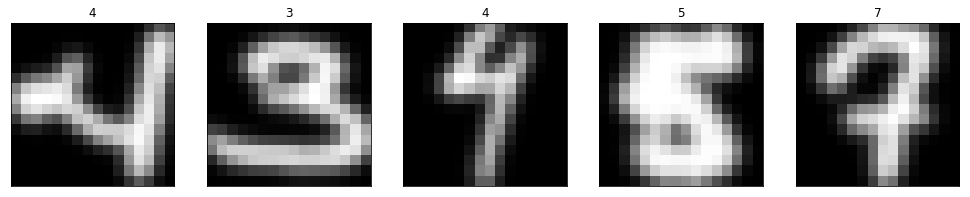

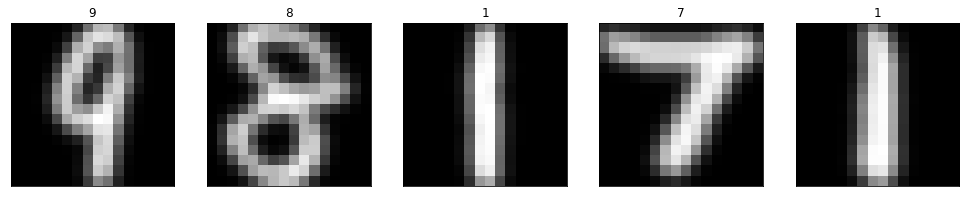

In [88]:
#Single Kernel:Gaussian kernel
width=15
C=1

gk=GaussianKernel()
gk.set_width(width)

svm=GMNPSVM(C, gk, labels)
_=svm.train(feats)
out=svm.apply(feats_rem)
evaluator = MulticlassAccuracy()
accuracy = evaluator.evaluate(out, labels_rem)

print("Accuracy = %2.2f%%" % (100*accuracy))

idx=np.where(out.get_labels() != Yrem)[0]
Xbad=Xrem[:,idx]
Ybad=Yrem[idx]
_=figure(figsize=(17,6))
gray()
plot_example(Xbad, Ybad)
print(out.get_labels()[idx[:5]])


idx=np.where(out.get_labels() == Yrem)[0]
Xgood=Xrem[:,idx]
Ygood=Yrem[idx]
_=figure(figsize=(17,6))
gray()
plot_example(Xgood, Ygood)
print(out.get_labels()[idx[:5]])

In [72]:
idx

array([  2,  28,  64,  72,  90,  95, 102, 122, 126, 141, 150, 199, 203,
       206, 220, 243, 251, 253, 256, 261, 269, 274, 275, 284, 295, 305,
       323, 325, 331, 350, 352, 353, 435, 439, 458, 485, 491, 494, 506,
       521, 524, 545, 568, 582, 594, 615, 645, 647], dtype=int64)